In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from natsort import natsorted
from myusefultools.parser import pickleVolScalarField

# Clay flux over time

Plot time evolution of clay fluxes over the interface.

In [2]:
## Elliot-Brooks phi
hydCond = 1.3E-3
head_m  = 2.39E-4
bed_wavelenght = 0.15
depth_bed = 0.20
channel_width = 0.29
porosity = 0.33
settling_vel = 6.13E-6 ##From Jin2018
Axy = bed_wavelenght*channel_width

qBar = (2*hydCond * head_m / bed_wavelenght) * np.tanh(2*np.pi*depth_bed/bed_wavelenght)
print("qBar = {:.2E} m/s".format(qBar))

qBar += 0.5 * porosity * settling_vel
print("qBar = {:.2E} m/s".format(qBar))

qBar *= Axy
print("qBar = {:.2E} m3/s".format(qBar))

qBar = 4.14E-06 m/s
qBar = 5.15E-06 m/s
qBar = 2.24E-07 m3/s


In [3]:
fields = ["suspendedClay","phi"]
RANS = pickleVolScalarField("/home/edsaa/nuModel/tempResults_review/noRelax_dp9.RANS",fields)
LES  = pickleVolScalarField("/home/edsaa/nuModel/tempResults_review/noRelax_dp9.LES",fields)

In [4]:
for df in [RANS,LES]:
    df['sumPhiIn (m3/s)'] = [ np.sum(np.maximum(-p,0)) for p in df['phi'] ]
    df['Time (d)'] = df['Time (s)']/86400
    df['massIn (kg/s/m2)'] = [ np.sum(np.multiply(-p,c))/Axy for p,c in zip(df['phi'],df['suspendedClay']) ]

In [5]:
CwInSurfaceWater = pd.read_csv("Cw_dataTable.csv")

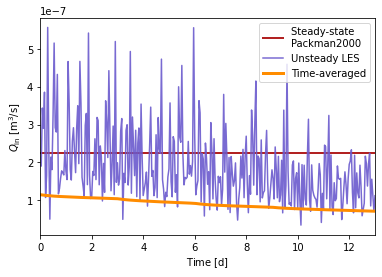

In [6]:
fig,ax = plt.subplots()
ax.axhline(y=qBar,label='Steady-state \nPackman2000',
           c='firebrick',lw=2)
ax.plot(LES['Time (d)'],LES['sumPhiIn (m3/s)'],label='Unsteady LES',
        c='slateblue',alpha=0.9,lw=1.5)
ax.plot(RANS['Time (d)'],RANS['sumPhiIn (m3/s)'],label='Time-averaged',
        c='darkorange',lw=3)
ax.set(ylabel=r"$Q_\mathsf{in} \; \mathsf{[m^3/s]}$",
       xlabel=r"$\mathsf{Time \; [d]}$",
       xlim=(0,13))
ax.legend()
plt.show()

In [7]:
CwInSurfaceWater['Time(d)'] = CwInSurfaceWater['Time(s)'] / 86400
CwInSurfaceWater['massIn (kg/s/m2)'] = CwInSurfaceWater['Conc(kg/m3)'] * qBar / Axy

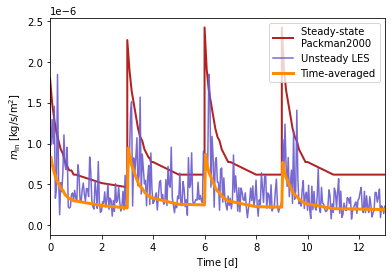

In [8]:
fig,ax = plt.subplots()
ax.plot(CwInSurfaceWater['Time(d)'],CwInSurfaceWater['massIn (kg/s/m2)'],label='Steady-state \nPackman2000',
        c='firebrick',lw=2)
ax.plot(LES['Time (d)'],LES['massIn (kg/s/m2)'],label='Unsteady LES',
        c='slateblue',alpha=0.9,lw=1.5)
ax.plot(RANS['Time (d)'],RANS['massIn (kg/s/m2)'],label='Time-averaged',
        c='darkorange',lw=3)
ax.set(ylabel=r"$m_\mathsf{in} \; \mathsf{[kg/s/m^2]}$",xlabel=r"$\mathsf{Time \; [d]}$",xlim=(0,13))
ax.legend()
plt.show()

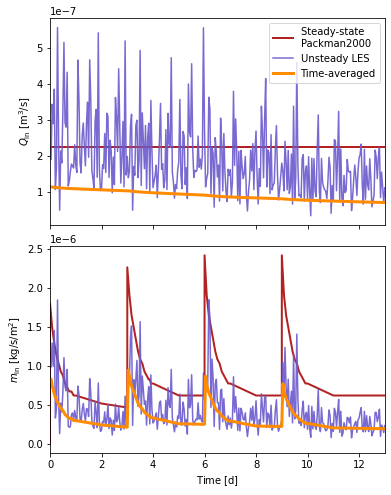

In [9]:
## Version 2 of plots

fig,axs = plt.subplots(2,1,figsize=[6,8],sharex=True,gridspec_kw={"hspace":0.1},squeeze=True)
ax = axs[0]
ax.axhline(y=qBar,label='Steady-state \nPackman2000',
           c='firebrick',lw=2)
ax.plot(LES['Time (d)'],LES['sumPhiIn (m3/s)'],label='Unsteady LES',
        c='slateblue',alpha=0.9,lw=1.5)
ax.plot(RANS['Time (d)'],RANS['sumPhiIn (m3/s)'],label='Time-averaged',
        c='darkorange',lw=3)
ax.set(ylabel=r"$Q_\mathsf{in} \; \mathsf{[m^3/s]}$",xlim=(0,13))
ax.legend()
ax = axs[1]
ax.plot(CwInSurfaceWater['Time(d)'],CwInSurfaceWater['massIn (kg/s/m2)'],label='Steady-state \nPackman2000',
        c='firebrick',lw=2)
ax.plot(LES['Time (d)'],LES['massIn (kg/s/m2)'],label='Unsteady LES',
        c='slateblue',alpha=0.9,lw=1.5)
ax.plot(RANS['Time (d)'],RANS['massIn (kg/s/m2)'],label='Time-averaged',
        c='darkorange',lw=3)
ax.set(ylabel=r"$m_\mathsf{in} \; \mathsf{[kg/s/m^2]}$",xlabel=r"$\mathsf{Time \; [d]}$",xlim=(0,13))
#plt.savefig("InterfaceFluxes.svg")
plt.show()